In [ ]:
# Importando libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Input, Dense

In [ ]:
# Sequential (armazena a sequencia de camadas (input e dense) que vão compor a rede neural). Input (possui propriedades de uma camada de entrada da rede neural). Dense (possui características de camada dense, multilayer)

In [ ]:
# Importando o Dataset

In [ ]:
dataset = boston_housing.load_data(test_split=.3, seed=256402)

65536/57026 [==================================] - 0s 0us/step


In [ ]:
pd.DataFrame(dataset[0][0])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,6.80117,0.0,18.10,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,396.90,14.70
1,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86
2,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
350,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,348.93,29.55
351,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
352,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37


In [ ]:
pd.DataFrame(dataset[0][1])

,0
0,20.0
1,33.1
2,50.0
3,21.1
4,11.0
...,...
349,19.7
350,23.7
351,23.1
352,12.5


In [ ]:
# Trabalhando o dataset e separando o conjunto de treino e teste

In [ ]:
treino = pd.concat([pd.DataFrame(dataset[0][0]),pd.DataFrame(dataset[0][1])], axis = 1, ignore_index=True)
teste = pd.concat([pd.DataFrame(dataset[1][0]),pd.DataFrame(dataset[1][1])], axis = 1, ignore_index=True)

In [ ]:
x_treino = treino[[2,7,8]].values

In [ ]:
y_treino = treino[[13]].values

In [ ]:
x_teste = treino[[2,7,8]].values
y_teste = treino[[13]].values

In [ ]:
# Modelo

In [ ]:
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(144, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 144)               576       
                                                                 
 dense_3 (Dense)             (None, 100)               14500     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,177
Trainable params: 15,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mae')

In [ ]:
model.fit(x_treino, y_treino, epochs=600, batch_size = 6)

Epoch 1/600
59/59 [==============================] - 1s 2ms/step - loss: 10.4751
Epoch 2/600
59/59 [==============================] - 0s 1ms/step - loss: 7.3459
Epoch 3/600
59/59 [==============================] - 0s 2ms/step - loss: 6.9566
Epoch 4/600
59/59 [==============================] - 0s 2ms/step - loss: 6.8432
Epoch 5/600
59/59 [==============================] - 0s 2ms/step - loss: 6.7640
Epoch 6/600
59/59 [==============================] - 0s 2ms/step - loss: 6.7008
Epoch 7/600
59/59 [==============================] - 0s 1ms/step - loss: 6.6524
Epoch 8/600
59/59 [==============================] - 0s 1ms/step - loss: 6.5706
Epoch 9/600
59/59 [==============================] - 0s 2ms/step - loss: 6.4563
Epoch 10/600
59/59 [==============================] - 0s 1ms/step - loss: 6.3877
Epoch 11/600
59/59 [==============================] - 0s 2ms/step - loss: 6.4761
Epoch 12/600
59/59 [==============================] - 0s 1ms/step - loss: 6.2827
Epoch 13/600
59/59 [================

In [ ]:
analise = pd.concat([pd.DataFrame(y_teste),pd.DataFrame(model.predict(x_teste))], axis = 1, ignore_index=True)

In [ ]:
abs(analise[0] - analise[1]).mean()

4.076504975658352

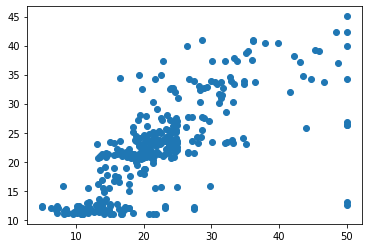

In [ ]:
plt.scatter(x=analise[0], y=analise[1])

(array([  6.,  26., 137., 133.,  29.,  14.,   4.,   3.,   0.,   2.]),
 array([-17.9521637 , -12.41807613,  -6.88398857,  -1.34990101,
          4.18418655,   9.71827412,  15.25236168,  20.78644924,
         26.3205368 ,  31.85462437,  37.38871193]),
 <a list of 10 Patch objects>)

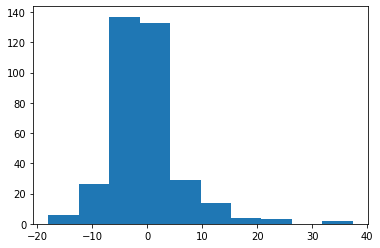

In [ ]:
plt.hist(analise[0] - analise[1])

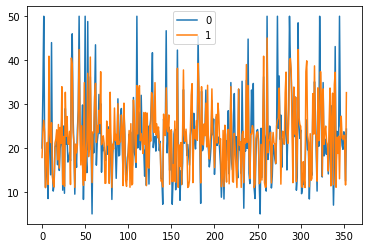

In [ ]:
analise.plot()